<a href="https://colab.research.google.com/github/dbetanc1/MAT494/blob/main/HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3
Calculus and Optimization

# 3.3 Unconstrained Optimization
Derive optimality conditions for unconstrained continuous
optimization problems and start with local minimizers.

# 3.3.1 Necessary and Suﬀicent Conditions of Local Minimizers

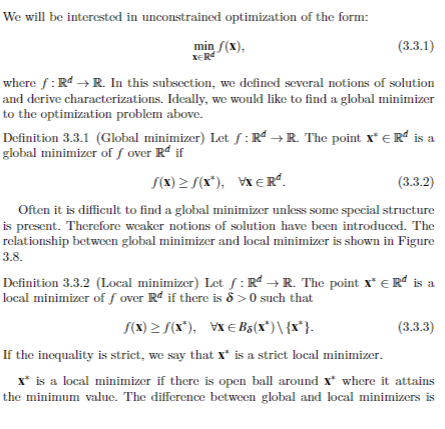
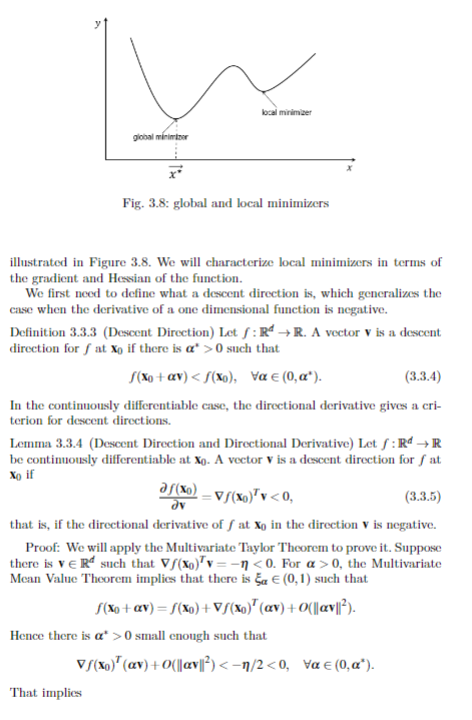


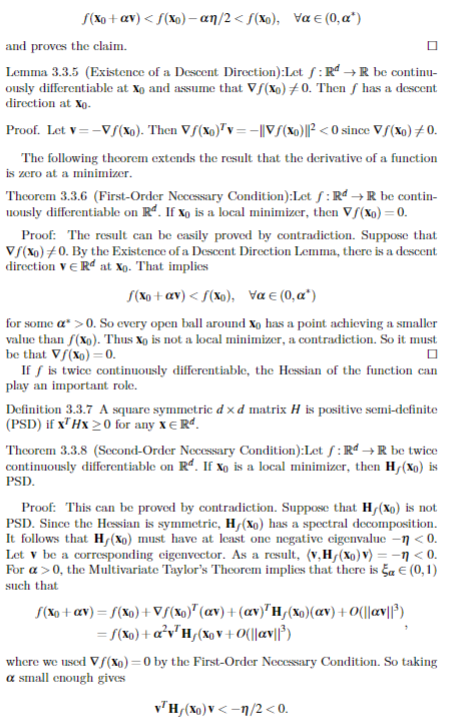
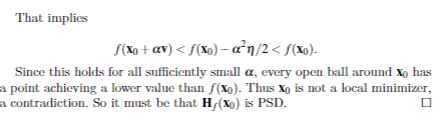

3.3.1.1 Suﬀicient conditions for Local Minimizers

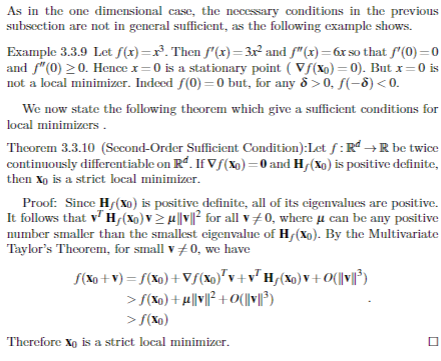

# 3.3.2 Convexity and Global Minimizers

A real-valued function is called convex if the line segment between any two
points on the graph of the function lies above the graph between the two
points. Our optimality conditions have only concerned local minimizers. In-
deed, in the absence of global structure, local information such as gradients
and Hessians can only inform about the immediate neighborhood of points.
Here we consider convexity, under which local minimizers are also global
minimizers.

3.3.2.1 Convex Sets and Functions

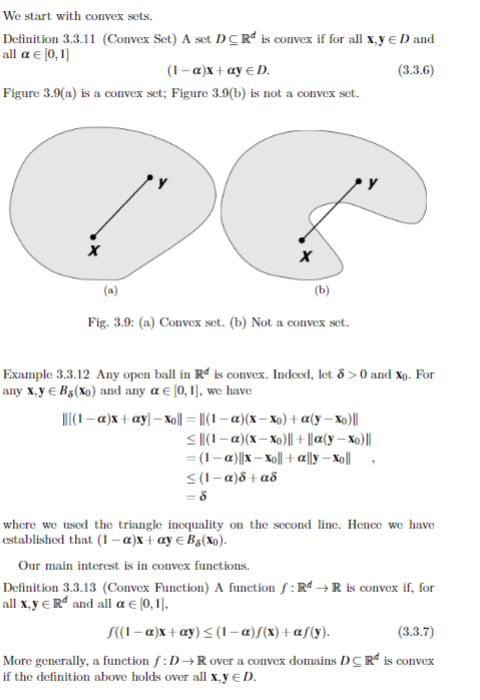

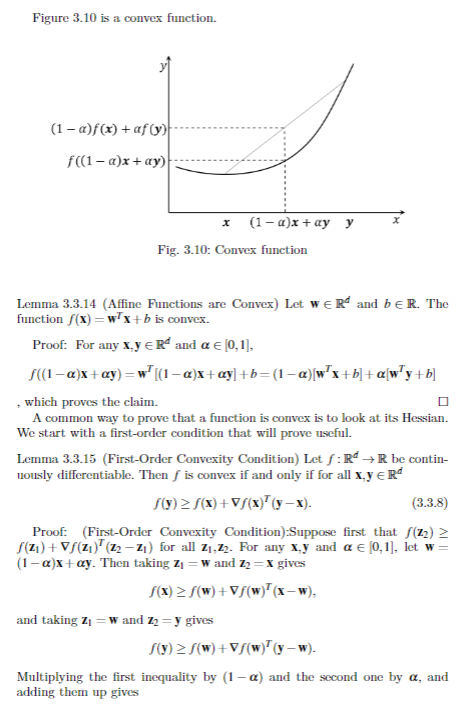

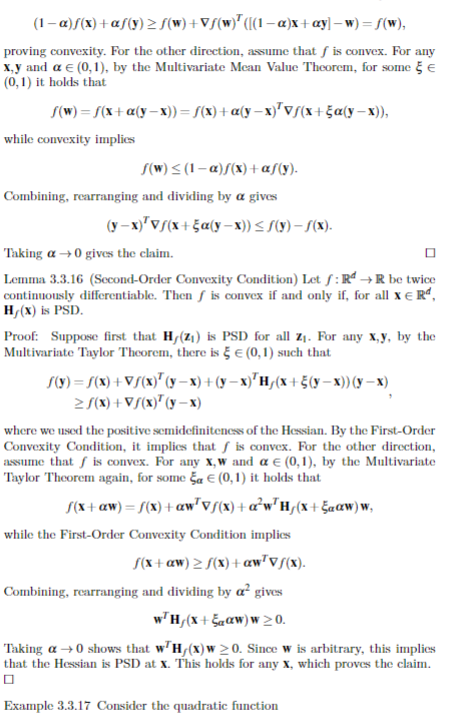

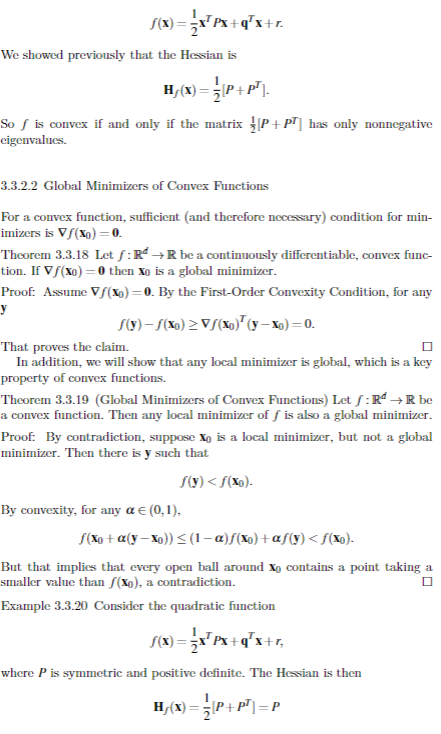

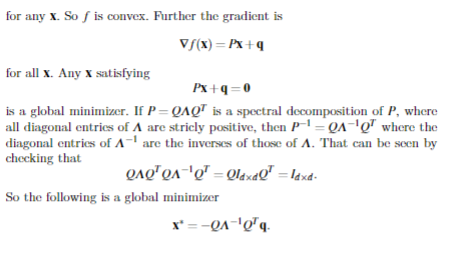

# 3.3.3 Gradient Descent

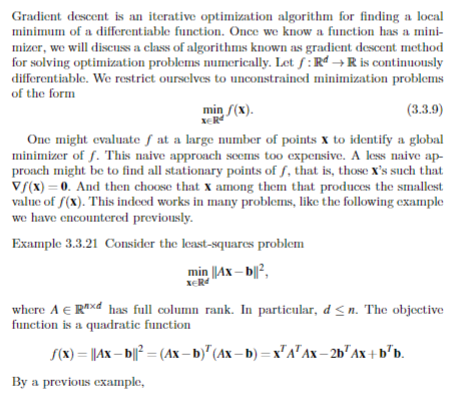

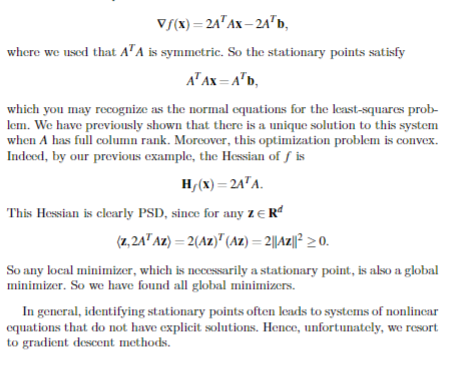

3.3.3.1 Steepest Descent

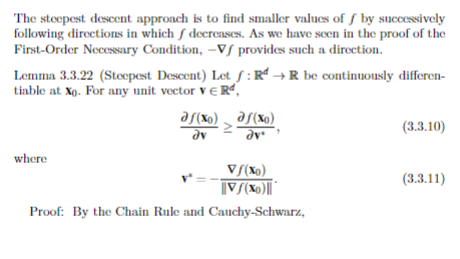

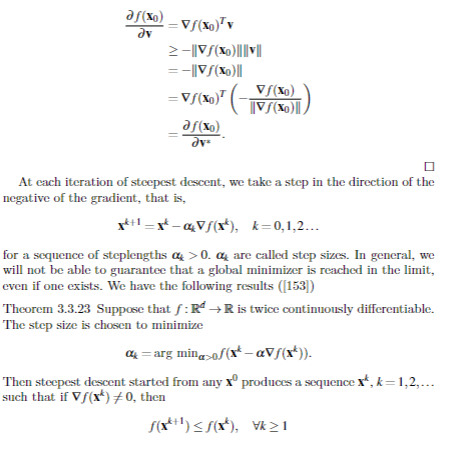